###Capital Bike Sharing


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Load the dataset
df_hr = pd.read_csv('CBS_Hourly.csv',low_memory=False)
df_day = pd.read_csv('CBS_Daily.csv',low_memory=False)
# df_full = pd.read_csv('CBS_Full.csv',low_memory=False)

# df_hr.head(50) 

# df_hr.info()    
# df_day.info()
# df_hr.describe()
# df_day.describe()
# df_hr.tail(50) 
df_hr.duplicated().sum()



df_hr = df_hr.rename(columns={'relativehumidity_2m (%)': 're_humidity', 'temperature_2m (°C)':'tempt_2m','weathercode (wmo code)':'wmo_code','windspeed_10m (km/h)':'wind_speed'})
df_hr


,Casual,Date,Hour,Member,Total_rides,re_humidity,tempt_2m,wmo_code,wind_speed
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9
...,...,...,...,...,...,...,...,...,...
26275,132.0,2023-12-31,19,190.0,322.0,71,-7.7,0,3.3
26276,125.0,2023-12-31,20,194.0,319.0,79,-10.2,0,6.7
26277,84.0,2023-12-31,21,137.0,221.0,80,-11.0,0,10.0
26278,83.0,2023-12-31,22,142.0,225.0,80,-10.4,0,8.7


In [73]:
#data cleaning for df_hr
df_hr 
df_hr.isnull().sum()
df_hr_n = df_hr.dropna(subset=['Casual', 'Member', 'Total_rides']) 
df_hr_n.isnull().sum() 
df_hr_n.isnull() 

# df_hr_n['Date'] = pd.to_datetime(df_hr_n['Date'], errors='coerce') 
df_hr_n.loc[:, 'Date'] = pd.to_datetime(df_hr_n['Date'], errors='coerce')
df_hr_n.isnull().sum()  
df_hr_n.duplicated().sum() 


0

In [142]:

# 
df_day_n 
df_day.duplicated().sum()
df_day_n = df_day.rename(columns={'apparent_temperature_mean (°C)':'apt_tempt_mean','temperature_2m_mean (°C)': 'tempt_2m_mean','weathercode (wmo code)':'wmo_code','windspeed_10m_max (km/h)':'wind_speed' })
df_day_n.isnull().sum()   
df_day_n.duplicated().sum()

df_day_clean= df_day_n.loc[:, 'Date'] = pd.to_datetime(df_day_n['Date'], errors='coerce')    
df_day_clean.isnull().sum()
df_day_clean.duplicated().sum() 
df_day_clean = df_day_n.dropna(subset=['apt_tempt_mean', 'tempt_2m_mean', 'wmo_code', 'wind_speed', 'Total_rides', 'Casual', 'Member', 'Date'])

df_day_clean.isnull().sum() 
df_day_clean 

,Casual,Date,Member,Total_rides,apt_tempt_mean,tempt_2m_mean,wmo_code,wind_speed
0,371,2021-01-01 00:00:00,590,961,-0.9,2.3,63,10.6
1,2874,2021-01-02 00:00:00,2844,5718,4.8,7.6,61,19.1
2,495,2021-01-03 00:00:00,1133,1628,0.9,3.9,63,13.0
3,907,2021-01-04 00:00:00,2074,2981,1.0,4.1,3,13.3
4,1057,2021-01-05 00:00:00,2004,3061,1.4,4.0,51,9.2
...,...,...,...,...,...,...,...,...
1090,646,2023-12-27 00:00:00,1934,2580,-8.6,-4.3,71,10.1
1091,3099,2023-12-28 00:00:00,4819,7918,-7.0,-2.5,0,12.8
1092,3491,2023-12-29 00:00:00,5168,8659,-7.8,-3.9,1,9.5
1093,3097,2023-12-30 00:00:00,4497,7594,-7.3,-2.9,1,13.8


In [143]:
#data cleaning for df_day
# print(df_day)


df_hr_clean  = df_hr_n.loc[:, 'Date'] = pd.to_datetime(df_hr_n['Date'], errors='coerce')
# df_hr_clean.isnull().sum()  
df_hr_clean.duplicated().sum()
df_hr_clean = df_hr_n.dropna(subset=['Casual', 'Member', 'Total_rides', 're_humidity', 'tempt_2m', 'wmo_code', 'wind_speed', 'Date', 'Hour'])
df_hr_clean 
df_hr_clean.isnull().sum()
df_hr_clean.duplicated().sum()
df_hr_clean   
df_hr_clean = df_hr_n.dropna(subset=['Casual', 'Member', 'Total_rides'])    
df_hr_clean.isnull().sum()   
df_hr_clean.duplicated().sum() 

df_day_clean.isnull().sum() 
df_day_n


,Casual,Date,Member,Total_rides,apt_tempt_mean,tempt_2m_mean,wmo_code,wind_speed
0,371,2021-01-01 00:00:00,590,961,-0.9,2.3,63,10.6
1,2874,2021-01-02 00:00:00,2844,5718,4.8,7.6,61,19.1
2,495,2021-01-03 00:00:00,1133,1628,0.9,3.9,63,13.0
3,907,2021-01-04 00:00:00,2074,2981,1.0,4.1,3,13.3
4,1057,2021-01-05 00:00:00,2004,3061,1.4,4.0,51,9.2
...,...,...,...,...,...,...,...,...
1090,646,2023-12-27 00:00:00,1934,2580,-8.6,-4.3,71,10.1
1091,3099,2023-12-28 00:00:00,4819,7918,-7.0,-2.5,0,12.8
1092,3491,2023-12-29 00:00:00,5168,8659,-7.8,-3.9,1,9.5
1093,3097,2023-12-30 00:00:00,4497,7594,-7.3,-2.9,1,13.8


In [144]:
print('Hourley data:\n',df_hr_clean)
print('Day Dataset:\n',df_day_clean)


Hourley data:
        Casual                 Date  Hour  Member  Total_rides  re_humidity  \
0        20.0  2021-01-01 00:00:00     0    26.0         46.0           90   
1        23.0  2021-01-01 00:00:00     1    23.0         46.0           88   
2        20.0  2021-01-01 00:00:00     2    28.0         48.0           87   
3         9.0  2021-01-01 00:00:00     3     7.0         16.0           81   
4         7.0  2021-01-01 00:00:00     4     5.0         12.0           77   
...       ...                  ...   ...     ...          ...          ...   
26275   132.0  2023-12-31 00:00:00    19   190.0        322.0           71   
26276   125.0  2023-12-31 00:00:00    20   194.0        319.0           79   
26277    84.0  2023-12-31 00:00:00    21   137.0        221.0           80   
26278    83.0  2023-12-31 00:00:00    22   142.0        225.0           80   
26279    82.0  2023-12-31 00:00:00    23   106.0        188.0           73   

       tempt_2m  wmo_code  wind_speed  
0       

Text(0.5, 1.0, 'Total Rides by Weather Code')

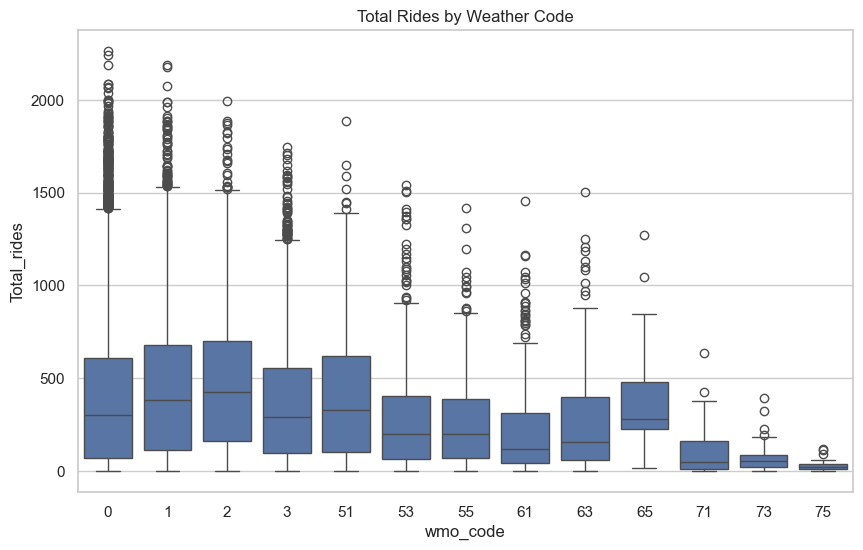

In [145]:
#data visualization for df_hr using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_hr_clean, x='wmo_code', y='Total_rides')        
plt.title('Total Rides by Weather Code')

In [146]:
#visualization for df_hr using barplot with month 
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Work consistently on df_hr_clean
df_hr_clean['Month'] = df_hr_clean['Date'].dt.month

# 2. Aggregate total rides per month & weather code
monthly_data = df_hr_clean.groupby(['Month','wmo_code'], as_index=False)['Total_rides'].sum()

# 3. Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_data, x='Month', y='Total_rides', hue='wmo_code', order=range(1,13))
plt.title('Total Rides by Month and Weather Code')
plt.xlabel('Month')
plt.ylabel('Total Rides')
plt.legend(title='Weather Code')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


AttributeError: Can only use .dt accessor with datetimelike values

In [147]:
#visualization for day dataset using barplot with month
df_day_n['Date'] = pd.to_datetime(df_day_n['Date'], errors='coerce')
# df_day_n['Month'] = df_day_n['Date'].dt.month
df_day_n['Month'] = df_day_n['Date'].dt.month_name().str[:3]
# df_day_n['Month'] = df_day_n['Date'].dt.strftime('%b')  # Short month names
# df_day_n['Month'] = df_day_n['Date'].dt.month.astype(str)  # Numeric month names    
# Uncomment the next line if you want to use seaborn for visualization


# import seaborn as sns
# import matplotlib.pyplot as plt


monthly_data = df_day_clean.groupby(['Month', 'wmo_code'])['Total_rides'].sum()

plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_data, x='Month', y='Total_rides', hue='wmo_code')
plt.title('Total Rides by Month and Weather Code (Daily Data)')
plt.xlabel('Month') 
plt.ylabel('Total Rides')
plt.legend(title='Weather Code')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



KeyError: 'Month'

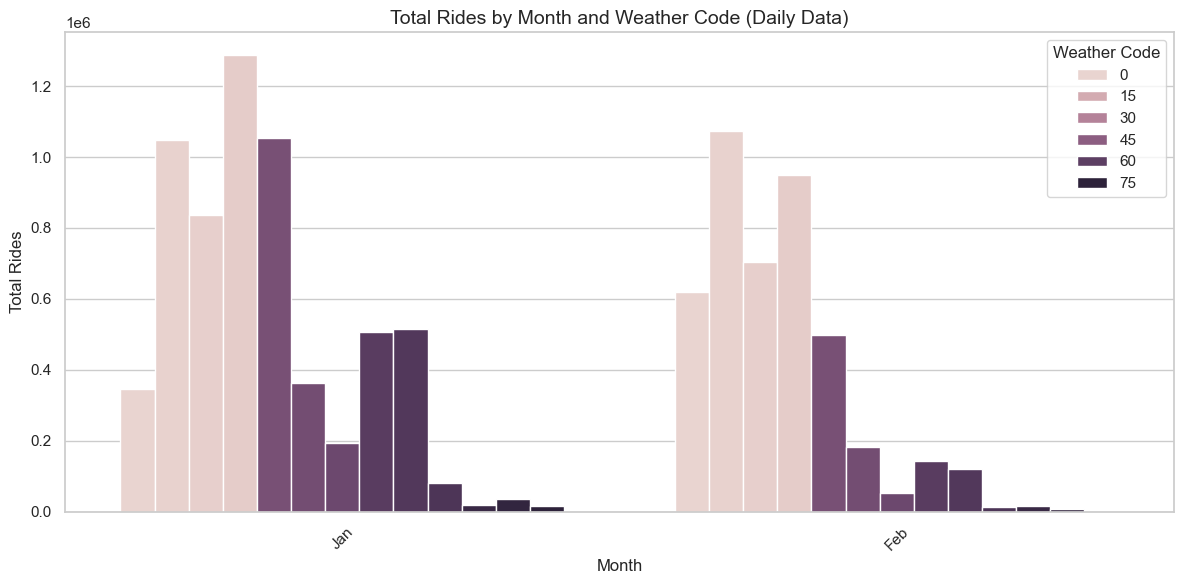

Months found in data: ['Jan', 'Feb']


In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Convert Date column to datetime (auto-detects day first if needed)
df_day_n['Date'] = pd.to_datetime(df_day_n['Date'], errors='coerce', dayfirst=True)

# 2. Drop rows where the date could not be parsed
df_day_n = df_day_n.dropna(subset=['Date'])

# 3. Extract month as short name (Jan, Feb, etc.)
df_day_n['Month'] = df_day_n['Date'].dt.month_name().str[:3]

# 4. Aggregate total rides per month and weather code
monthly_data = df_day_n.groupby(['Month', 'wmo_code'], as_index=False)['Total_rides'].sum()

# 5. Determine which months exist in the dataset (in chronological order)
month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
present_months = [m for m in month_order if m in monthly_data['Month'].unique()]

# 6. Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=monthly_data,
    x='Month', y='Total_rides', hue='wmo_code',
    order=present_months
)

plt.title('Total Rides by Month and Weather Code (Daily Data)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Rides')
plt.legend(title='Weather Code')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7. Optional: Print which months actually exist in your dataset
print("Months found in data:", present_months)


            Date  Total_rides
1045  2023-11-12        11353
1046  2023-11-13        12633
1047  2023-11-14        14563
1048  2023-11-15        14484
1049  2023-11-16        15123
1050  2023-11-17        14820
1051  2023-11-18        13922
1052  2023-11-19        11955
1053  2023-11-20        10828
1054  2023-11-21         3686
1055  2023-11-22         9470
1056  2023-11-23         6135
1057  2023-11-24         7621
1058  2023-11-25         7459
1059  2023-11-26         5282
1060  2023-11-27         9697
1061  2023-11-28         9513
1062  2023-11-29        10081
1063  2023-11-30        12555
1064  2023-12-01         8831
1065  2023-12-02        13250
1066  2023-12-03         8819
1067  2023-12-04        11624
1068  2023-12-05        12216
1069  2023-12-06        11426
1070  2023-12-07        11227
1071  2023-12-08        12472
1072  2023-12-09        13512
1073  2023-12-10         4556
1074  2023-12-11         9458
1075  2023-12-12        11089
1076  2023-12-13        11382
1077  2023

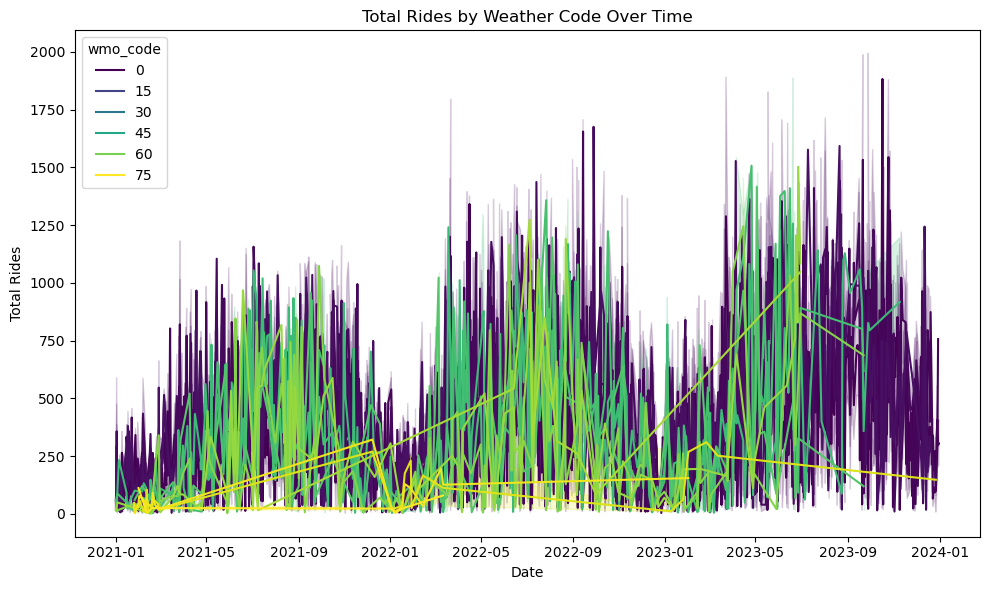

In [7]:
#data visualization for df_hr
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_hr_n, x='Date', y='Total_rides', hue='wmo_code', palette='viridis') 
plt.title('Total Rides by Weather Code Over Time')
plt.xlabel('Date')
plt.ylabel('Total Rides')   
# plt.xticks(rotation=45)
# plt.legend(title='Weather Code')
plt.tight_layout()
plt.show()  

C:\Users\skyli\AppData\Local\Temp\ipykernel_20656\3176938545.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hr_n['wmo_code'] = df_hr_n['wmo_code'].astype(str)  # Ensure wmo_code is treated as a string
C:\Users\skyli\AppData\Local\Temp\ipykernel_20656\3176938545.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hr_n['Date'] = pd.to_datetime(df_hr_n['Date'], errors='coerce')


<Figure size 1500x1000 with 0 Axes>

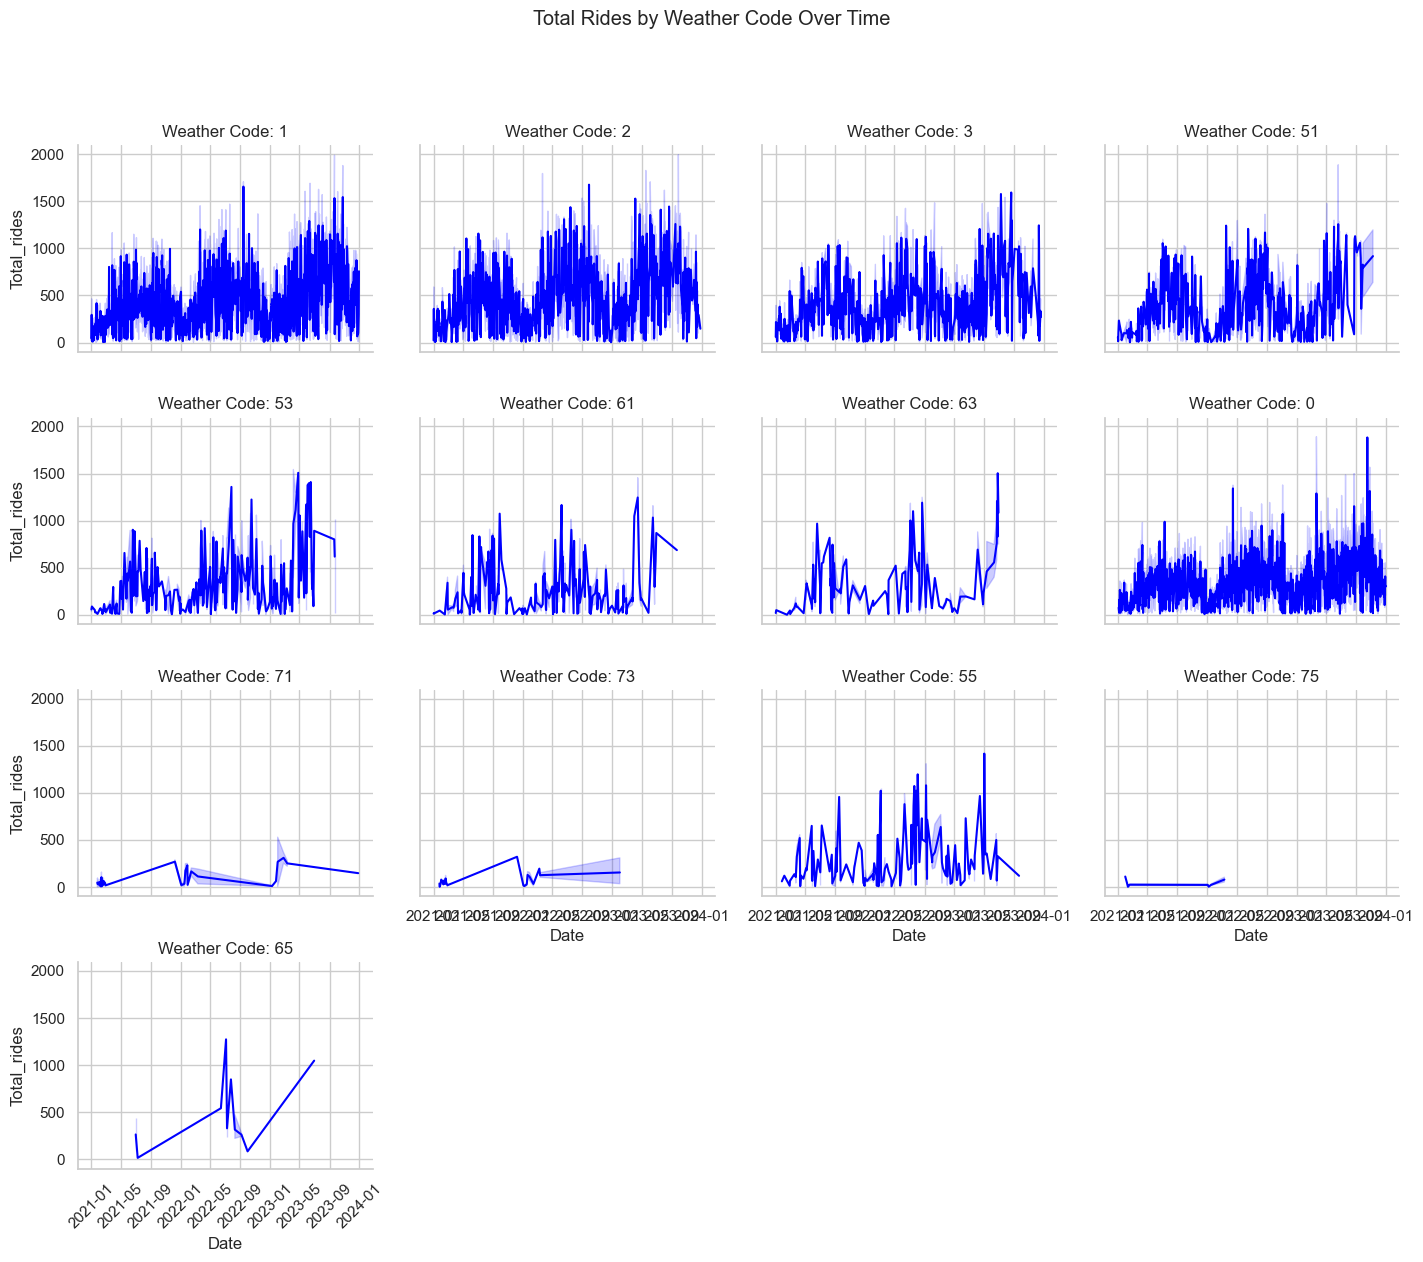

In [20]:
df_hr_n 
#data visualization using facetgrid for horuly data with weather code,total rides and date
plt.figure(figsize=(15, 10))
sns.set_theme(style="whitegrid")                        
df_hr_n['wmo_code'] = df_hr_n['wmo_code'].astype(str)  # Ensure wmo_code is treated as a string
df_hr_n['Date'] = pd.to_datetime(df_hr_n['Date'], errors='coerce')  
        
g = sns.FacetGrid(df_hr_n, col='wmo_code', col_wrap=4, height=3, aspect=1.2)    
g.map(sns.lineplot, 'Date', 'Total_rides', color='blue')
g.set_titles("Weather Code: {col_name}")
g.fig.suptitle("Total Rides by Weather Code Over Time", y=1.05)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# g = sns.FacetGrid(red_wine, col='quality_label', col_order=['low', 'medium', 'high'], height=4, aspect=1.2)
# g.map(sns.histplot, 'pH', bins=20, color='teal')
# g.set_titles("Wine Quality: {col_name}")
# g.fig.suptitle("pH Distribution Across Wine Quality Levels in Red wine", y=1.05)
# plt.show()
# g = sns.FacetGrid(white_wine, col='quality_label', col_order=['low', 'medium', 'high'], height=4, aspect=1.2)
# g.map(sns.histplot, 'pH', bins=20, color='teal')
# g.set_titles("Wine Quality: {col_name}")
# g.fig.suptitle("pH Distribution Across Wine Quality Levels in White wine", y=1.05)
# plt.show()
# g = sns.FacetGrid(all_wine, col='quality_label', col_order=['low', 'medium', 'high'], height=4, aspect=1.2)
# g.map(sns.histplot, 'pH', bins=20, color='teal')
# g.set_titles("Wine Quality: {col_name}")
# g.fig.suptitle("pH Distribution Across Wine Quality Levels in All wine", y=1.05)
# plt.show()




In [8]:
df_day_n

,Casual,Date,Member,Total_rides,apt_tempt_mean,tempt_2m_mean,wmo_code,wind_speed
0,371,2021-01-01 00:00:00,590,961,-0.9,2.3,63,10.6
1,2874,2021-01-01 00:00:00,2844,5718,4.8,7.6,61,19.1
2,495,2021-01-01 00:00:00,1133,1628,0.9,3.9,63,13.0
3,907,2021-01-01 00:00:00,2074,2981,1.0,4.1,3,13.3
4,1057,2021-01-01 00:00:00,2004,3061,1.4,4.0,51,9.2
...,...,...,...,...,...,...,...,...
1090,646,2021-02-15 00:00:00,1934,2580,-8.6,-4.3,71,10.1
1091,3099,2021-02-15 00:00:00,4819,7918,-7.0,-2.5,0,12.8
1092,3491,2021-02-15 00:00:00,5168,8659,-7.8,-3.9,1,9.5
1093,3097,2021-02-15 00:00:00,4497,7594,-7.3,-2.9,1,13.8


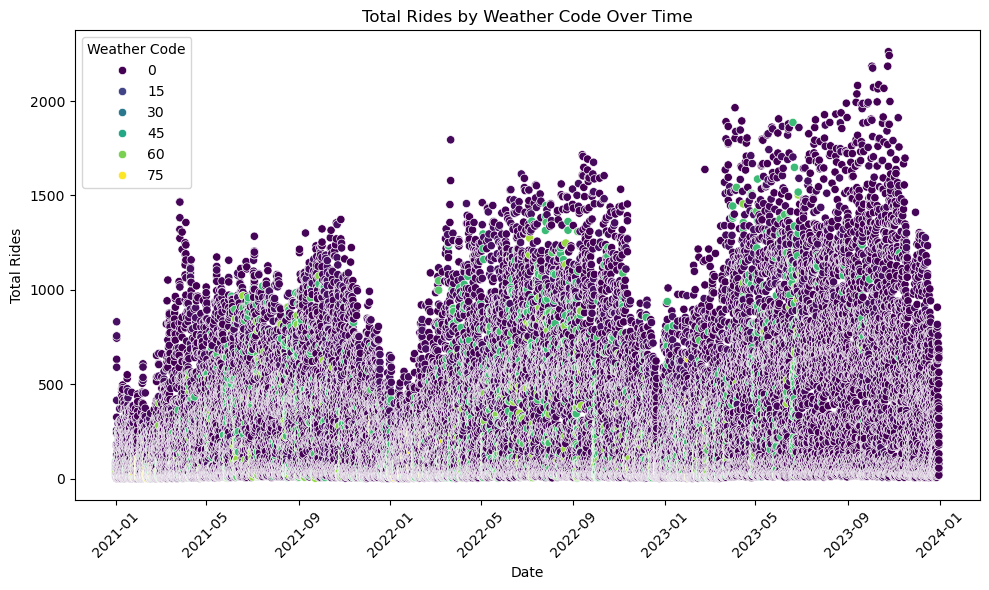

In [9]:
#scatter plot for df_hr
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_hr_n, x='Date', y='Total_rides', hue='wmo_code', palette='viridis') 
plt.title('Total Rides by Weather Code Over Time')
plt.xlabel('Date')
plt.ylabel('Total Rides')   
plt.xticks(rotation=45)
plt.legend(title='Weather Code')
plt.tight_layout()
plt.show()  

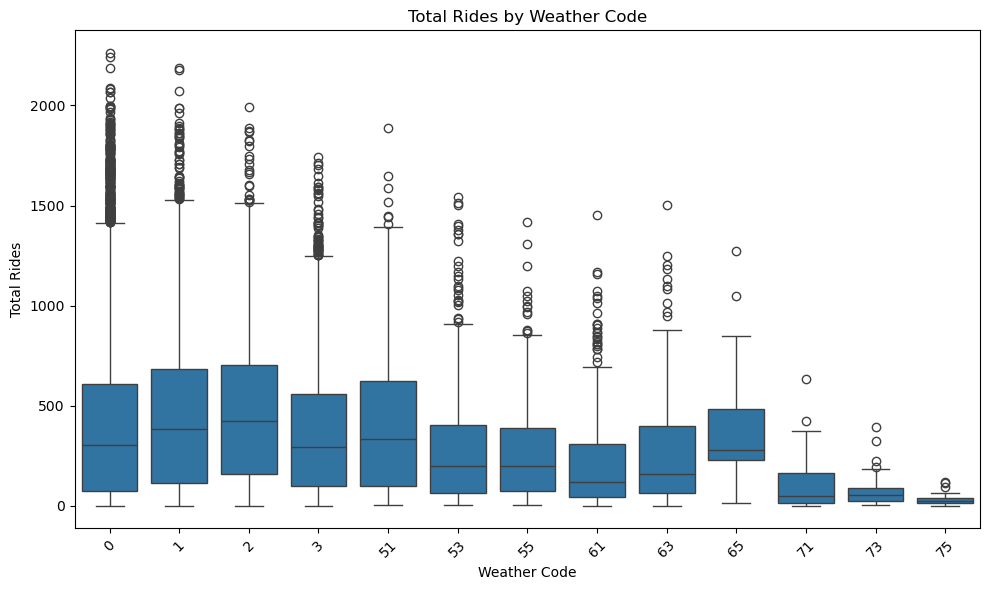

In [10]:
#data visualization 
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_hr_n, x='wmo_code', y='Total_rides')        
plt.title('Total Rides by Weather Code')
plt.xlabel('Weather Code')
plt.ylabel('Total Rides')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()  
# df = pd.read_csv("/Users/ms/Desktop/CAB/Datasets/BikeShare/Datasets/CBS_2021_2023/CBS_2021-2023_Full.csv")

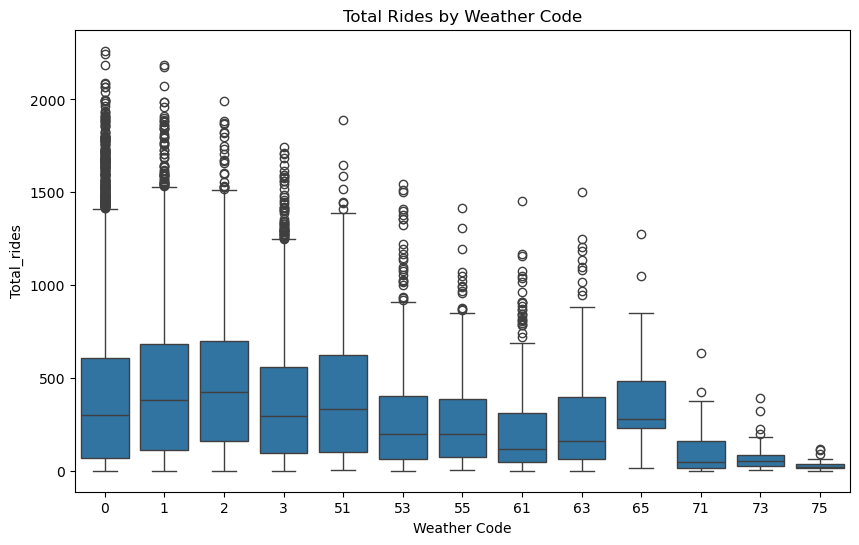

In [12]:
#visualization
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_hr_n, x='wmo_code', y='Total_rides')    
# --- IGNORE ---
plt.title('Total Rides by Weather Code')
plt.xlabel('Weather Code')  
plt.show()  


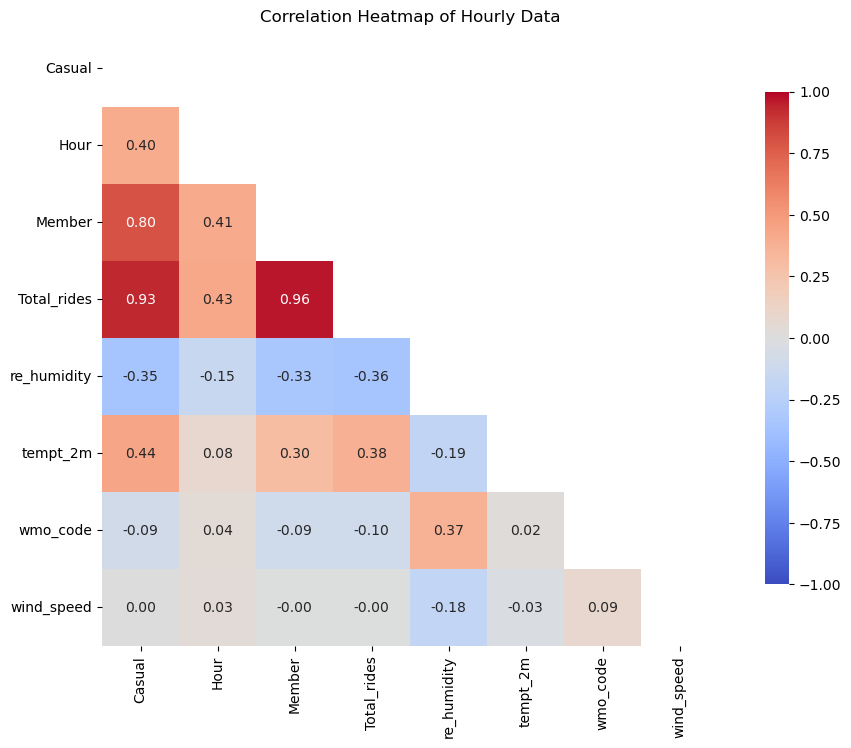

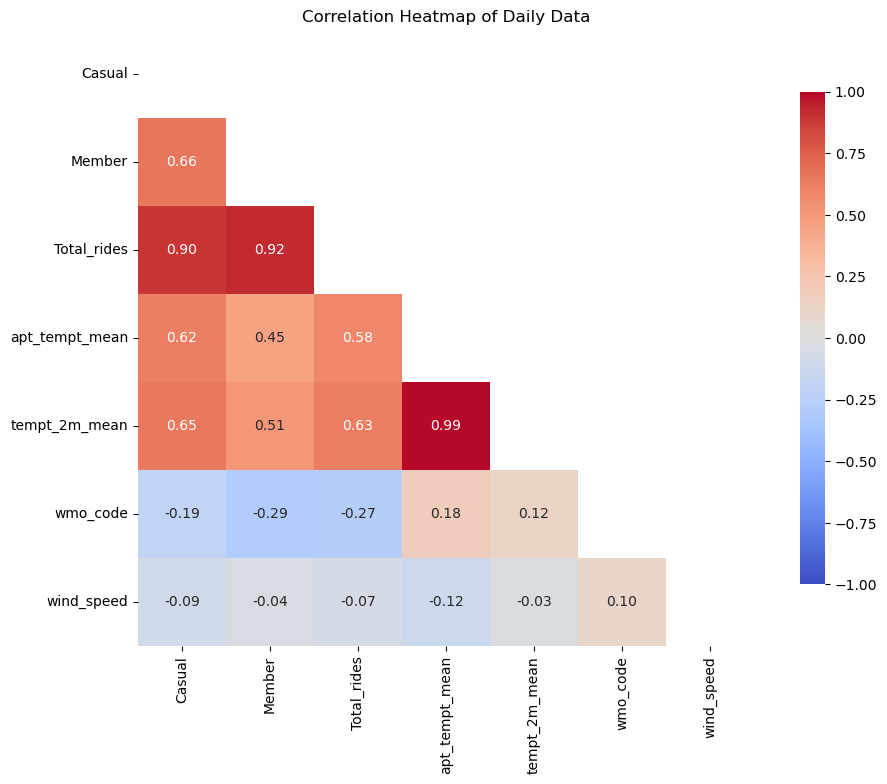

In [13]:
#visualization using heatmap    
#  Select only numeric columns
numeric_df = df_hr_n.select_dtypes(include=['float64', 'int64'])

#  correlation
corr_matrix = numeric_df.corr()

# heatmap
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',mask=mask, fmt='.2f',vmax=1, vmin=-1, square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Hourly Data')
plt.show()

#visualization using heatmap for df_day
#  Select only numeric columns
numeric_df_day = df_day_n.select_dtypes(include=['float64', 'int64'])   
#  correlation
corr_matrix_day = numeric_df_day.corr()
# heatmap
plt.figure(figsize=(12, 8))
mask_day = np.triu(np.ones_like(corr_matrix_day, dtype=bool))   
sns.heatmap(corr_matrix_day, annot=True, cmap='coolwarm', mask=mask_day, fmt='.2f', vmax=1, vmin=-1, square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Daily Data')
plt.show()  

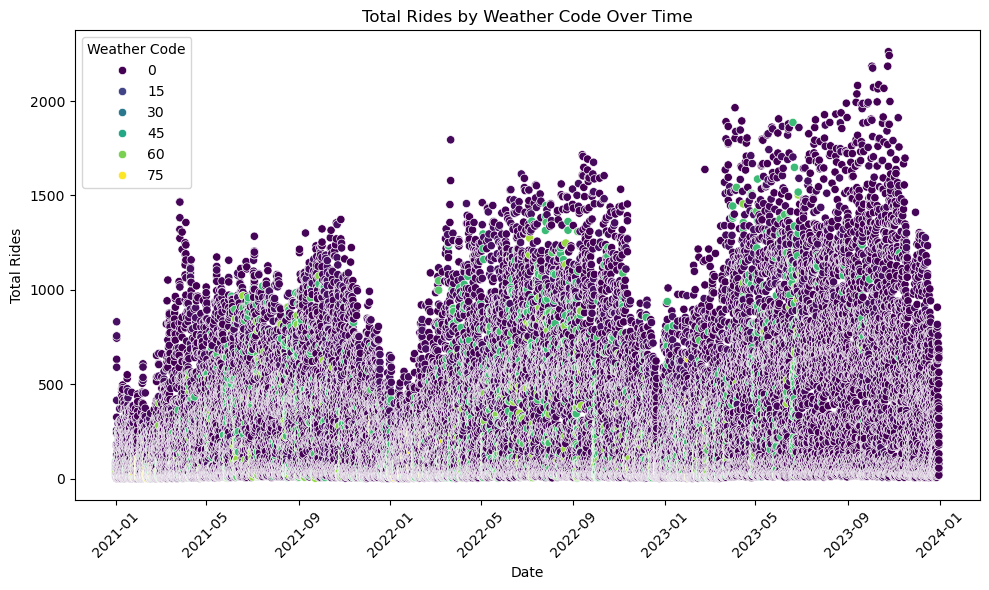

In [14]:
#visualization using scatter plot for df_hr
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_hr_n, x='Date', y='Total_rides', hue='wmo_code', palette='viridis') 
plt.title('Total Rides by Weather Code Over Time')      
plt.xlabel('Date')
plt.ylabel('Total Rides')   
plt.xticks(rotation=45)
plt.legend(title='Weather Code')
plt.tight_layout()
plt.show()

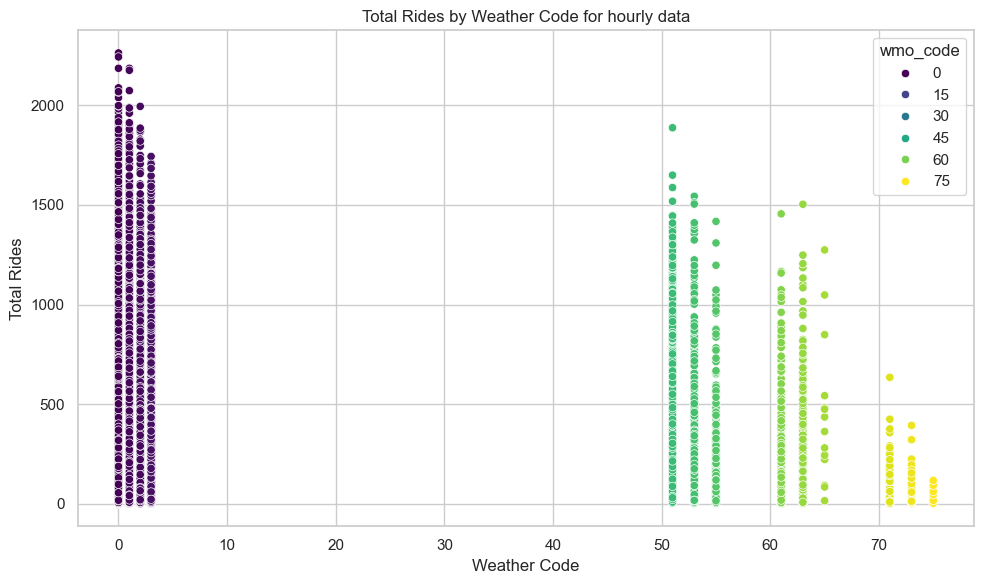

In [93]:
#visualization of relationship between 'Total_rides' and 'wmo_code'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_hr_clean, x='wmo_code', y='Total_rides', hue='wmo_code', palette='viridis') 
plt.title('Total Rides by Weather Code for hourly data')
plt.xlabel('Weather Code')
plt.ylabel('Total Rides')   
plt.tight_layout()
plt.show()  

In [118]:
# #visualization of relationship between 'Total_rides' and 'wmo_code'
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data= df_day_clean, x='wmo_code', y='Total_rides', hue='wmo_code', palette='viridis') 
# plt.title('Total Rides by Weather Code for Day data')
# plt.xlabel('Weather Code')
# plt.ylabel('Total Rides')   
# plt.tight_layout()
# plt.show()  

In [17]:
df_day_n 


,Casual,Date,Member,Total_rides,apt_tempt_mean,tempt_2m_mean,wmo_code,wind_speed
0,371,2021-01-01 00:00:00,590,961,-0.9,2.3,63,10.6
1,2874,2021-01-01 00:00:00,2844,5718,4.8,7.6,61,19.1
2,495,2021-01-01 00:00:00,1133,1628,0.9,3.9,63,13.0
3,907,2021-01-01 00:00:00,2074,2981,1.0,4.1,3,13.3
4,1057,2021-01-01 00:00:00,2004,3061,1.4,4.0,51,9.2
...,...,...,...,...,...,...,...,...
1090,646,2021-02-15 00:00:00,1934,2580,-8.6,-4.3,71,10.1
1091,3099,2021-02-15 00:00:00,4819,7918,-7.0,-2.5,0,12.8
1092,3491,2021-02-15 00:00:00,5168,8659,-7.8,-3.9,1,9.5
1093,3097,2021-02-15 00:00:00,4497,7594,-7.3,-2.9,1,13.8


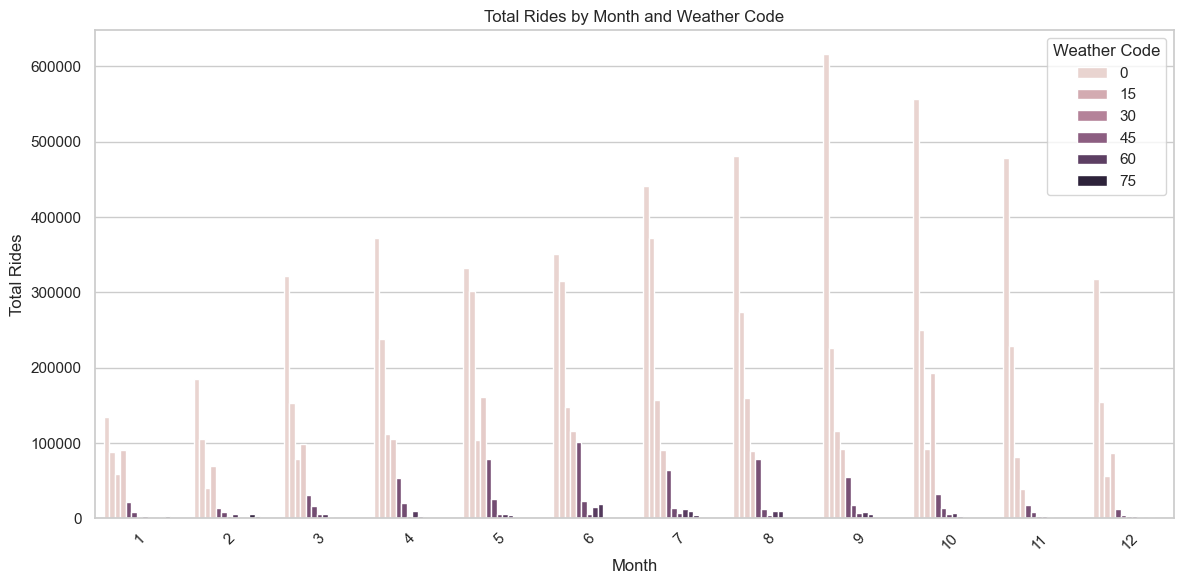

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Ensure Date is datetime
df_hr_clean['Date'] = pd.to_datetime(df_hr_clean['Date'], errors='coerce', dayfirst=True)

# 2. Extract month (numeric or name)
df_hr_clean['Month'] = df_hr_clean['Date'].dt.month  # 1 to 12

# 3. Aggregate total rides by month & weather
monthly_data = df_hr_clean.groupby(['Month', 'wmo_code'], as_index=False)['Total_rides'].sum()

# 4. Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_data, x='Month', y='Total_rides', hue='wmo_code', order=range(1,13))
plt.title('Total Rides by Month and Weather Code')
plt.xlabel('Month')
plt.ylabel('Total Rides')
plt.legend(title='Weather Code')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [117]:

# # 1. Ensure Date is datetime
# df_day_clean['Date'] = pd.to_datetime(df_day_clean['Date'], errors='coerce', dayfirst=True)

# # 2. Extract month (numeric or name)
# df_day_clean['Month'] = df_day_clean['Date'].dt.month  # 1 to 12

# # 3. Aggregate total rides by month & weather
# monthly_data = df_day_clean.groupby(['Month', 'wmo_code'], as_index=False)['Total_rides'].sum()

# # 4. Plot bar chart
# plt.figure(figsize=(12, 6))
# sns.barplot(data=monthly_data, x='Month', y='Total_rides', hue='wmo_code', order=range(1,13))
# plt.title('Total Rides by Month and Weather Code')
# plt.xlabel('Month')
# plt.ylabel('Total Rides')
# plt.legend(title='Weather Code')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()
df_day_clean  

0       2021-01-01
1       2021-01-01
2       2021-01-01
3       2021-01-01
4       2021-01-01
           ...    
26275   2023-12-31
26276   2023-12-31
26277   2023-12-31
26278   2023-12-31
26279   2023-12-31
Name: Date, Length: 26269, dtype: datetime64[ns]